# Assignment 3: Phishing websites
## Decission Tree Classification

Python code for constructing and validating a decision tree that predicts whether a website is a phishing site or not is shown first. Image of the chosen tree then follows together with written instructions for its usage.

Description of the dataset and the dataset itself can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/00327.

In [1]:
import urllib
import subprocess
import pandas as pd
import IPython

from scipy.io import arff
from io import StringIO

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  

In [2]:
response=urllib.request.urlopen(
    r'https://archive.ics.uci.edu/ml/' + 
    r'machine-learning-databases/00327/Training%20Dataset.arff')

content = StringIO(response.read().decode())

data = arff.loadarff(content)

df = pd.DataFrame(data[0], dtype='int')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [4]:
X = df.drop(['Result'], axis=1)
y = df.Result

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

dt = DecisionTreeClassifier(
    min_impurity_decrease=0.02,
).fit(X_train,y_train)

y_pred = dt.predict(X_test)

print(
    'Confusion matrix:',
    confusion_matrix(y_test, y_pred),
    '\nClassification report:',
    classification_report(y_test, y_pred),
    sep='\n'
)

Confusion matrix:
[[ 914  100]
 [ 107 1090]]

Classification report:
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90      1014
           1       0.92      0.91      0.91      1197

   micro avg       0.91      0.91      0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



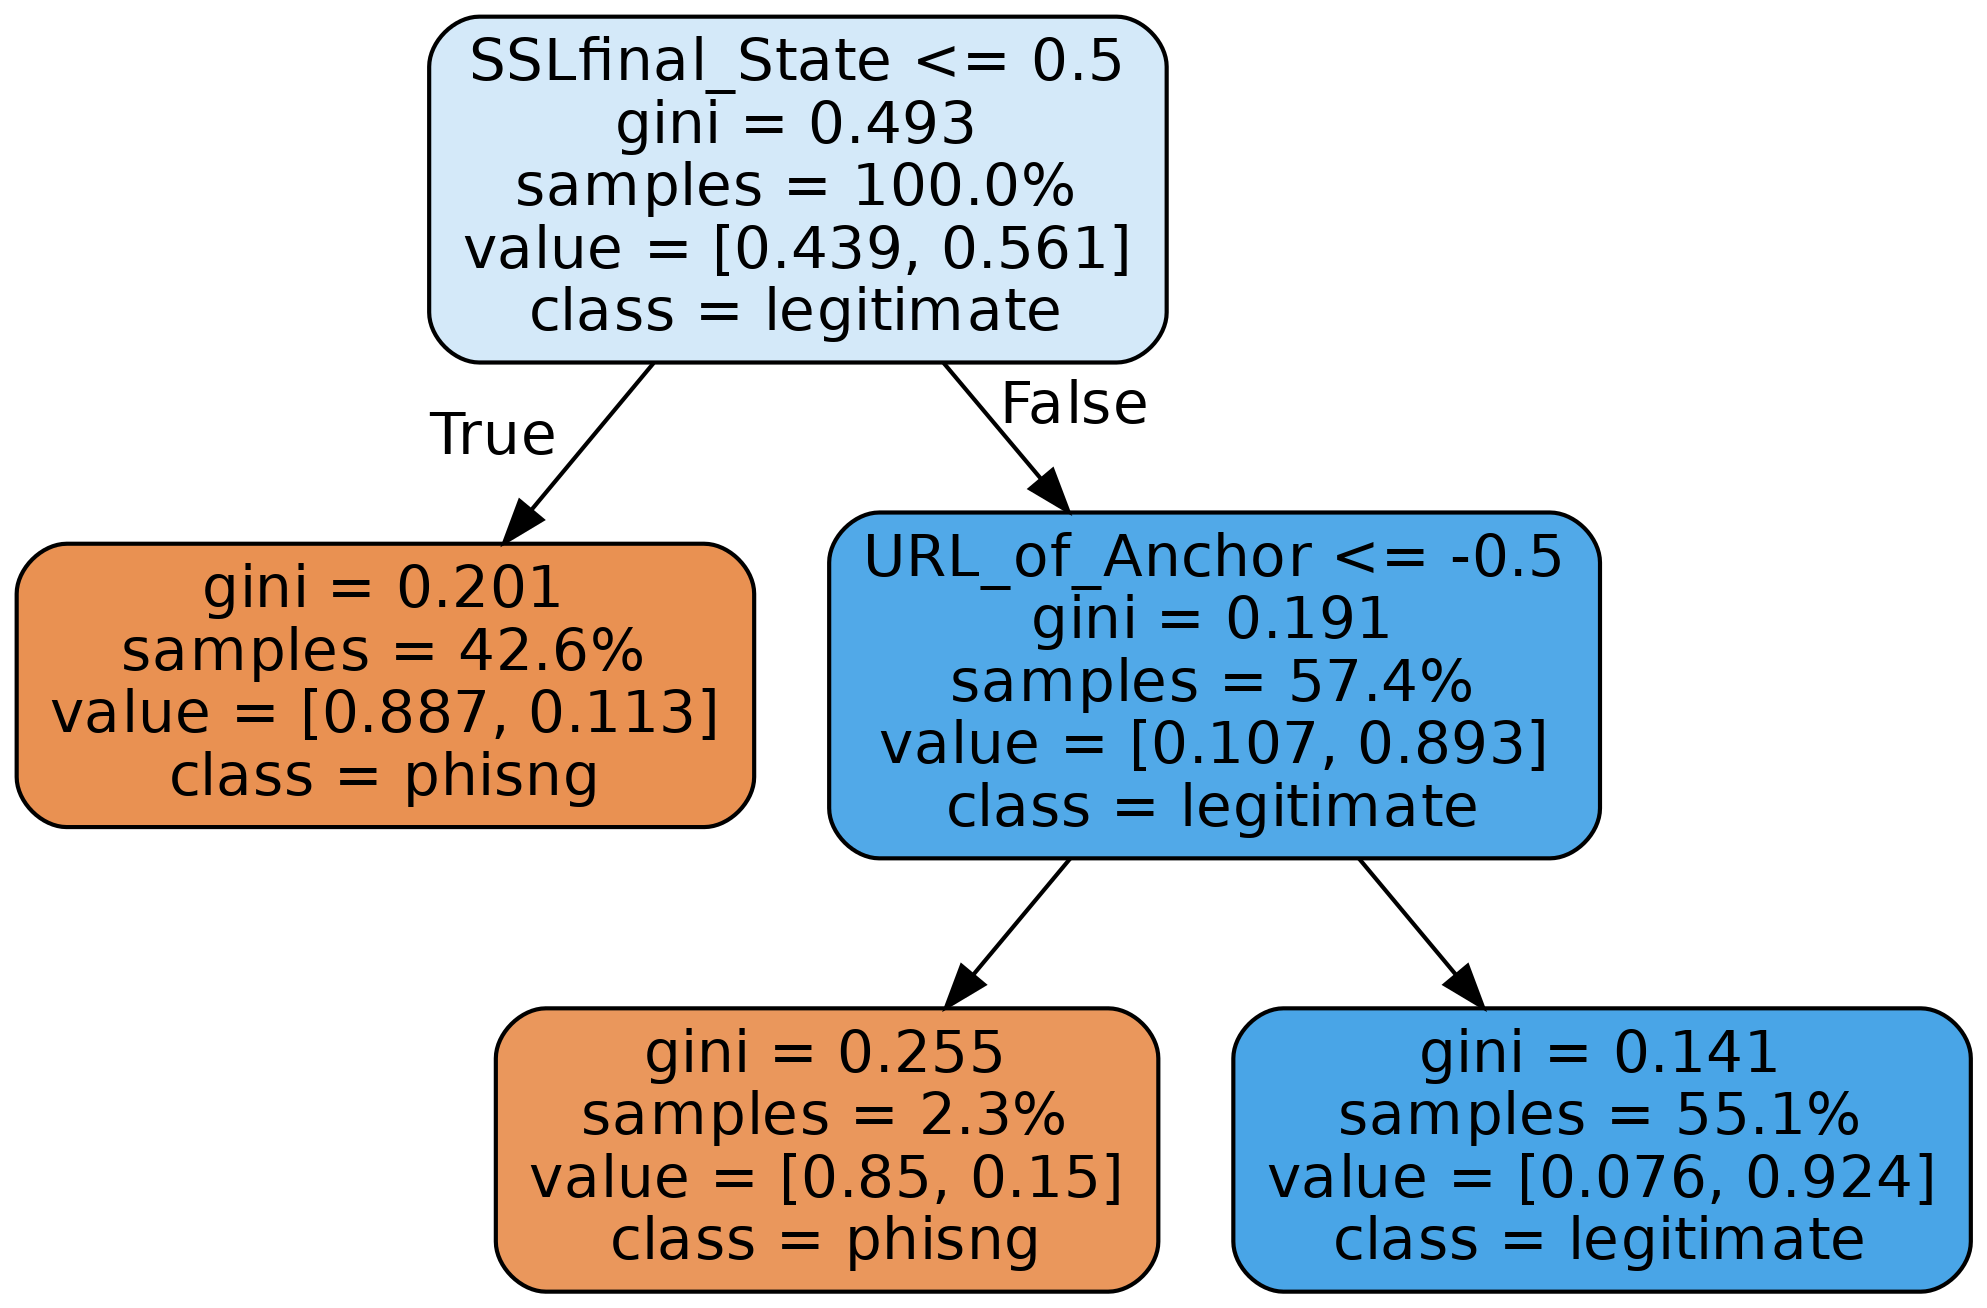

In [6]:
export_graphviz(
    dt,
    out_file='tree.dot',
    feature_names=X.columns,
    class_names=['phisng', 'legitimate'],
    filled=True,
    proportion=True,
    rounded=True,
)

# displaying the tree this way - using Graphviz directly had issues when trying to export this notebook
subprocess.call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])
IPython.display.Image(filename='tree.png')

# How to spot of a possible phishing site

Firstly, check whether the website uses HTTPS, if it does not or the certificated is not issued by a thrystworthy authority, it likely is a phishing site. However, if it that is fine, examin whether anchors (links) of the website, if most of them link to websites with different domain names or do not link to any website, it is likely a phising website. Otherwise, it is probably a legitimate website, however, be always suspecious.

The accuracy of this simple method is about 90% according to our validation set. Even more complex decision trees had similar accuracy, the best performance was around 96% with a very large tree. Therefore, I chose this tree as a quite general and fast heurestics.